In [ ]:
!pip install -e git+https://github.com/CYHSM/DeepInsight.git#egg=DeepInsight

Obtaining DeepInsight from git+https://github.com/CYHSM/DeepInsight.git#egg=DeepInsight
  Cloning https://github.com/CYHSM/DeepInsight.git to ./src/deepinsight
  Running command git clone -q https://github.com/CYHSM/DeepInsight.git /content/src/deepinsight
     |████████████████████████████████| 458.3 MB 11 kB/s 
  Running setup.py develop for DeepInsight


In [ ]:
!pip install git+https://github.com/CYHSM/wavelets

  Cloning https://github.com/CYHSM/wavelets to /tmp/pip-req-build-7hs8vxaa
  Running command git clone -q https://github.com/CYHSM/wavelets /tmp/pip-req-build-7hs8vxaa
  Created wheel for wavelets: filename=wavelets-0.1-py3-none-any.whl size=10243 sha256=f0b10f077d4d7f4b936754b6f75997716099263ce0901e34b5062bcf2826ab73
  Stored in directory: /tmp/pip-ephem-wheel-cache-tyam0qov/wheels/64/4e/73/5139e517b726eef51b1f37eab1e4f14835bf231fec340ab437
Successfully built wavelets


In [ ]:
pip install git+git://github.com/alok-ai-lab/DeepInsight.git#egg=DeepInsight

  Cloning git://github.com/alok-ai-lab/DeepInsight.git to /tmp/pip-install-j0muebh0/deepinsight_3a860f94f50e4389b184683be2548b8c
  Running command git clone -q git://github.com/alok-ai-lab/DeepInsight.git /tmp/pip-install-j0muebh0/deepinsight_3a860f94f50e4389b184683be2548b8c
  Created wheel for DeepInsight: filename=DeepInsight-0.1.0-py3-none-any.whl size=17216 sha256=f8c734c81f56667b65583001ae3b6c20e20dfe719ff08bd00d24ff989edffd5c
  Stored in directory: /tmp/pip-ephem-wheel-cache-e583ese5/wheels/e4/bc/9d/c483e2a4902573f36c6a2a2e90e247662dada37685d34c1a58
Successfully built DeepInsight
  Attempting uninstall: DeepInsight
    Found existing installation: deepinsight 0.5
    Can't uninstall 'deepinsight'. No files were found to uninstall.


In [ ]:
from pyDeepInsight import ImageTransformer, LogScaler
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWh6A0WLjsyBh1e_ZfZuCsSTPXkMNmpVs5gKb3Ewm5GlBgRUEANrL8Y
Mounted at /content/drive


**LOADING THE DATASET AND SPLITTING IT TO TRAIN AND TEST SETS**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/FYP /DATASETS /cnn_data/train_cnn.csv')
test = pd.read_csv('/content/drive/MyDrive/FYP /DATASETS /cnn_data/test_cnn.csv')

In [ ]:
x_train = train.iloc[:, 0:77].values
y_train = train.iloc[:, 77].values

In [ ]:
x_test= test.iloc[:, 0:77].values
y_test = test.iloc[:, 77].values

Text(0.5, 1.0, 'CNN - Train set distribution visualization')

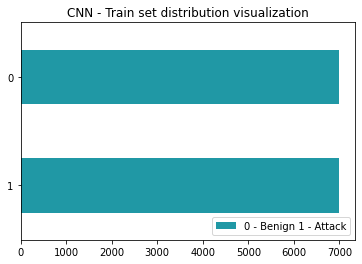

In [ ]:
import matplotlib.pyplot as plt
output_count = train['output'].value_counts()
output_count.plot(kind='barh', color='#2098A5')
plt.legend(['0 - Benign 1 - Attack'], loc='lower right')
plt.title('CNN - Train set distribution visualization')

Text(0.5, 1.0, 'CNN - Test set distribution visualization')

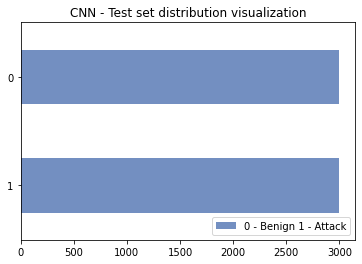

In [ ]:
import matplotlib.pyplot as plt
output_count = test['output'].value_counts()
output_count.plot(kind='barh', color='#738FC1')
plt.legend(['0 - Benign 1 - Attack'], loc='lower right')
plt.title('CNN - Test set distribution visualization')

In [ ]:
x_train.shape

(14000, 77)

In [ ]:
y_train.value_counts()

1    7000
0    7000
Name: output, dtype: int64

In [ ]:
x_test.shape

(6000, 77)

In [ ]:
y_test.value_counts()

1    3000
0    3000
Name: output, dtype: int64

**NORMALIZATION WITH LOG SCALER**

In [ ]:
ls = LogScaler() #normalizes data within the range 0 and 1
x_train = ls.fit_transform(x_train)
x_test = ls.transform(x_test)

**TRANSFORMATION**

In [ ]:
image_transformer = ImageTransformer(feature_extractor='tsne',
                      pixels=20, random_state=0,
                      n_jobs=-1)

# Transform features to an image matrix using dimensionality reduction
# This class takes in data normalized between 0 and 1 and converts it to a
# CNN compatible 'image' matrix

**CONVEX HULL ALGORITHM**

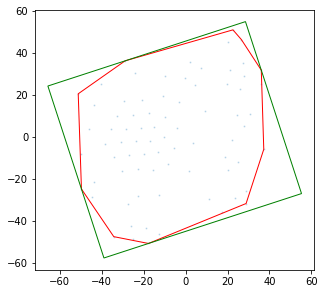

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, metric='cosine',
            random_state=0)
image_transformer = ImageTransformer(feature_extractor=tsne, pixels=20)

plt.figure(figsize=(5, 5))
image_transformer.fit(x_train, plot=True)

#pixel count determines the image resolution
#features do not overlap and the neighbouring relationship between the features are preserved
#cosine was chosen as the default metirc (Euclidean) leads to feature overlapping and outlier formation
# with perplexity of 5 outliers are formed and features are far apart

**FEATURE MAP VISUALIZATION**

Text(0.5, 1.0, 'Feature per pixel')

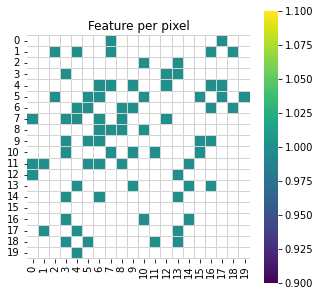

In [ ]:
fdm = image_transformer.feature_density_matrix()
plt.figure(figsize=(5, 5))
feature_map = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, linecolor="lightgrey", square=True)
plt.title("Feature per pixel")
# resolution - pixel count 20 (chosen)
# none of the 77 features overlap
# feature_map - feature map is mapped into this variable for transformation of train/test sets

**TRANSFORMING TABULAR SAMPLES TO IMAGE SAMPLES**

In [ ]:
train_image_samples = image_transformer.fit_transform(x_train)
test_image_samples = image_transformer.transform(x_test)

In [ ]:
train_image_samples.shape

(14000, 20, 20, 3)

In [ ]:
test_image_samples.shape

(6000, 20, 20, 3)

In [ ]:
y_train.shape

(14000,)

(20, 20, 3)

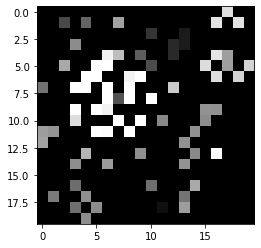

In [ ]:
plt.imshow(train_image_samples[0])
train_image_samples[0].shape

**TEST AND TRAIN IMAGE EXPLORATION**

In [ ]:
classes = ['CLASS - BENIGN', 'CLASS - ATTACK']

def plot_sample(x, y, index):
  plt.figure(figsize=(5,5))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

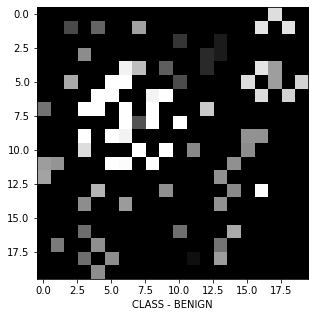

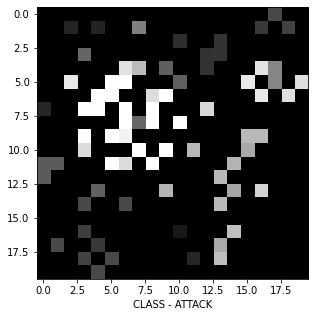

In [ ]:
plot_sample(train_image_samples, y_train, 0)
plot_sample(train_image_samples, y_train, 2)

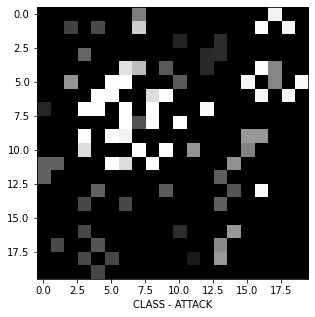

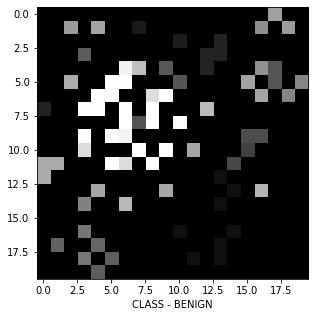

In [ ]:
plot_sample(test_image_samples, y_test, 0)
plot_sample(test_image_samples, y_test, 2)

**MODEL TRAINING**

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import History

In [ ]:
from tensorflow.keras import datasets, layers, models
cnn = tf.keras.models.Sequential([

                  # CNN
                  layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(20,20,3)),
                  layers.MaxPooling2D((2,2)),
                  layers.Flatten(),

                  # Fully connected layer
                  layers.Dense(10, activation='relu'),

                  # Output layer
                  layers.Dense(1, activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
History = cnn.fit(x=train_image_samples, y=y_train, validation_data=(test_image_samples, y_test), epochs=4)

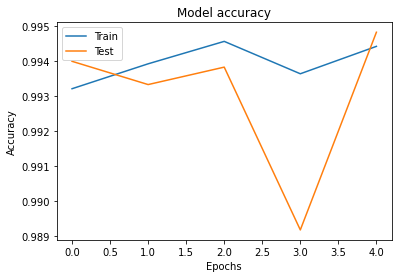

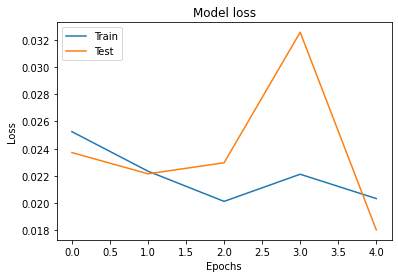

In [ ]:
import matplotlib.pyplot as plt

#epoch count 10

plt.plot(History.history['accuracy'], label='accuracy')
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()